In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as ss
import seaborn as sns
import pingouin as pg
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt



In [94]:
# Задание 1. A/B–тестирование

# 1.1 Условие
# Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем
# метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на
# сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги 
# эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

# 1.2 Входные данные

# В качестве входных данных Вы имеете 4 csv-файла:

# groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе
# (А – контроль, B – целевая группа) 
# groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
# active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
# checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

# 1.3 Вопросы

# Предлагаем Вам ответить на следующие вопросы:

# На какие метрики Вы смотрите в ходе анализа и почему?
# Имеются ли различия в показателях и с чем они могут быть связаны?
# Являются ли эти различия статистически значимыми?
# Стоит ли запускать новую механику на всех пользователей?
# Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

In [95]:
# Загружаем все файлы

active_studs= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_active_studs информация о пользователях зашедших на платформу в день эксперимента.csv')
# информация о пользователях, которые зашли на платформу в дни проведения эксперимента

In [96]:
active_studs

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [97]:
active_studs.nunique

<bound method DataFrame.nunique of       student_id
0         581585
1        5723133
2        3276743
3        4238589
4        4475369
...          ...
8336     1794344
8337      296883
8338     3598448
8339     3610547
8340      205705

[8341 rows x 1 columns]>

In [98]:
active_studs = active_studs.rename(columns = {'student_id' : 'id'})

In [99]:
active_studs

,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [100]:
checks= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_checks информация об оплатах пользователей в дни проведения эксперимента.csv', sep = ';')
# информация об оплатах пользователей в дни проведения эксперимента

In [101]:
checks

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [102]:
checks = checks.rename(columns = {'student_id' : 'id'})

In [103]:
checks.nunique

<bound method DataFrame.nunique of           id     rev
0       1627   990.0
1       3185   690.0
2      25973   690.0
3      26280   690.0
4     100300   990.0
..       ...     ...
536  5645737  1900.0
537  5651566  1900.0
538  5662322  1900.0
539  5681918  1900.0
540  5740903  1900.0

[541 rows x 2 columns]>

In [104]:
rev_id=active_studs.merge(checks, how='inner', on='id')

In [105]:
rev_id
# пользователи, зашедшие на платформу в день проведения эксперимента и оплатившие покупку в день проведения эксперимента. 
# За бортом остаются (исключаются в результате мерджа) пользователи, оплатившие покупку в день проведения эксперимента 
# на какой-то (каких-то) другой (других) платформе (платформах ). Таких пользователей - 149 человек (541-392=149)
# В работу берем только 392 человека. 149 человек нас не интересуют. 
# 392/8341*100=4,7% - процент оплативших в день проведения эксперимента

,id,rev
0,1184303,1530.0000
1,3354191,1900.0001
2,3278734,1900.0000
3,720651,1980.0000
4,1232221,1900.0000
...,...,...
387,3890326,199.0000
388,1390994,398.0000
389,1516339,290.0000
390,3910596,597.0000


In [106]:
group_add= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_group_add дополнительный файл с пользователями который вам передали спустя 2 дня после передачи данных.csv')
# дополнительный файл с пользователями, который прислали спустя 2 дня после передачи данных

In [107]:
group_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [108]:
groups= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_groups.csv', sep = ';')
# принадлежность пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 

In [109]:
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [110]:
# Объединяем датафреймы
merge_groups= pd.concat([groups, group_add], ignore_index = True, sort = False)


In [111]:
merge_groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74571,200247820,B
74572,201032527,B
74573,201067612,B
74574,201067653,B


In [112]:
# Эксперимент ставился на 11% пользователей (8341/74576*100=11%)

In [113]:
table=rev_id.merge(merge_groups, how='inner', on='id')
# информация по 392 пользователям, сделавшим покупку на платформе в день эксперимента

In [114]:
table

,id,rev,grp
0,1184303,1530.0000,A
1,3354191,1900.0001,B
2,3278734,1900.0000,B
3,720651,1980.0000,A
4,1232221,1900.0000,B
...,...,...,...
387,3890326,199.0000,B
388,1390994,398.0000,A
389,1516339,290.0000,A
390,3910596,597.0000,B


In [115]:
grp_A=table.query('grp=="A"')
# датафрейм для расчета ARPPU по группе А
# информация по пользователям из контрольной группы
# оплативших пользователей из контрольной группы было 20% (78/392*100=20%)
                 

In [116]:
grp_A

,id,rev,grp
0,1184303,1530.0,A
3,720651,1980.0,A
10,4337103,580.0,A
14,332387,2910.0,A
17,1659434,690.0,A
...,...,...,...
379,445767,3660.0,A
382,1202202,2910.0,A
383,2306271,290.0,A
388,1390994,398.0,A


In [117]:
ARPPU_A=grp_A

In [118]:
ARPPU_A.describe()

,id,rev
count,7.800000e+01,78.000000
mean,2.924680e+06,933.589744
std,1.657487e+06,919.932711
min,1.627000e+03,199.000000
25%,1.403057e+06,290.000000
50%,3.176553e+06,585.000000
75%,4.345213e+06,1114.750000
max,5.577840e+06,3660.000000


In [119]:
grp_B=table.query('grp=="B"')

In [120]:
grp_B

,id,rev,grp
1,3354191,1900.0001,B
2,3278734,1900.0000,B
4,1232221,1900.0000,B
5,3821501,1900.0000,B
6,1036096,1900.0000,B
...,...,...,...
385,2692209,1900.0001,B
386,2081846,1900.0000,B
387,3890326,199.0000,B
390,3910596,597.0000,B


In [121]:
grp_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 391
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      314 non-null    int64  
 1   rev     314 non-null    float64
 2   grp     314 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


In [122]:
ARPPU_B=grp_B
# датафрейм для расчета ARPPU по группе В

In [123]:
# Оплативших экспериментальных пользователей было 80% (314/392*100=80%). 


In [124]:
# Итого по описательной статистике имеем показатели (присмотримся к ним как к метрикам):
#        grp_A  vs  grp_B
# rev_sum 72820      394974   
# mean    933.58     1257.88
# 50%     585        1140
# std     919.93     790.86



In [125]:
active_studs_1=active_studs.merge(merge_groups, how='inner', on='id')

In [126]:
active_studs_1
# для расчета количества пользователей в разрезе групп А и В, зашедших на сайт в день эксперимента

,id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B
...,...,...
8336,1794344,B
8337,296883,B
8338,3598448,B
8339,3610547,B


In [127]:
active_studs_1=active_studs_1.merge(checks, how='left', on='id')
# крепим к таблице active_studs_1 еще и деньги

In [128]:
active_studs_1=active_studs_1.fillna(0)

In [129]:
active_studs_1

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0
...,...,...,...
8336,1794344,B,0.0
8337,296883,B,0.0
8338,3598448,B,0.0
8339,3610547,B,290.0


In [130]:
active_studs_A=active_studs_1.query('grp=="A"').fillna(0)
# выбираем пользователей группы А

In [131]:
active_studs_A

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
3,4238589,A,0.0
7,1394612,A,0.0
21,5194768,A,0.0
...,...,...,...
8317,3208984,A,0.0
8320,2900558,A,0.0
8326,1161774,A,0.0
8330,5006972,A,0.0


In [132]:
ARPU_A=active_studs_A
# датафрейм для расчета ARPU по группе А

In [133]:
active_studs_B=active_studs_1.query('grp=="B"').fillna(0)
# пользователи группы В

In [134]:
active_studs_B

,id,grp,rev
2,3276743,B,0.0
4,4475369,B,0.0
5,5481015,B,0.0
6,1353433,B,0.0
8,1170611,B,0.0
...,...,...,...
8336,1794344,B,0.0
8337,296883,B,0.0
8338,3598448,B,0.0
8339,3610547,B,290.0


In [135]:
ARPU_B=active_studs_B
# датафрейм для расчета ARPU по группе В

In [136]:
# Метрики:

# Конверсия-отношение числа пользователей, которые выполнили какое-либо целевое действие к общему числу пользователей
# ARPU (average revenue per user) средний доход с привлеченного пользователя=доход/количество пользователей
# ARPPU (average revenue per paying user) средний доход с привлеченного клиента=доход/количество клиентов
# Количество покупок=доход/средний чек

In [137]:
# grp_A vs grp_B

# conversion_grp_A=78/1538*100=5,07%
# conversion_grp_B=314/6803*100=4,6%

# ARPU группа А=72820/1538=47,35
# ARPU группа B=394974/6803=58,06

# ARPPU группа А=72820/78=933,58 (он же mean получается)
# ARPPU группа B=394974/314=1257.88 (он же mean получается)

In [138]:
# Гипотезы:

# conversation
# H0=conversion в группах статистически значимо не отличается
# H1=в группах по conversion есть статистически значимые отличия

# ARPU
# H0=ARPU в группах статистически значимо не отличается
# H1=в группах по ARPU есть статистически значимые отличия

# ARPPU
# H0=ARPPU в группах статистически значимо не отличается
# H1=в группах по ARPPU есть статистически значимые отличия

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


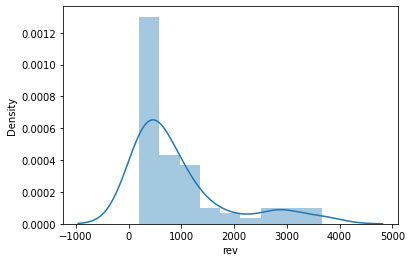

In [139]:

sns.distplot(grp_A.rev)
# визуализация по группе А для анализа ARPPU


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


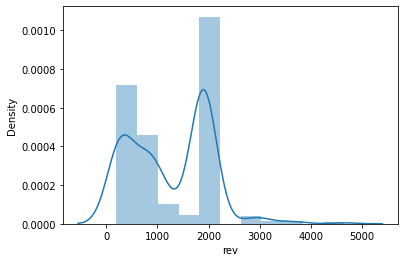

In [140]:
sns.distplot(grp_B.rev)
# визуализация по группе B для анализа ARPPU
#Распределение не нормальное, да еще и с выбросами в районе 2000. Народ подорвался за дешевизной.

In [141]:
ARPU_table = active_studs_1.groupby('grp', as_index = False).agg({'rev':'sum', 'id':'nunique'}) 
# Таблица для расчета среднего дохода с привлеченного пользователя

In [142]:
ARPU_table

,grp,rev,id
0,A,72820.0000,1538
1,B,394974.0035,6803


In [143]:
ARPU_table['ARPU'] = ARPU_table.rev/ARPU_table.id

In [144]:
ARPU_table
# Cредний доход с привлеченного пользователя

,grp,rev,id,ARPU
0,A,72820.0000,1538,47.347204
1,B,394974.0035,6803,58.058798


In [145]:
ARPPU_table=table.groupby('grp', as_index=False).agg({'rev':'sum'})
# Таблица для расчета среднего дохода с привлеченного клиента

In [146]:
ARPPU_table

,grp,rev
0,A,72820.0000
1,B,394974.0035


In [147]:
ARPPU_table = table.query('rev > 0').groupby('grp', as_index = False).agg({'rev':'sum', 'id':'nunique'}) 



In [148]:
ARPPU_table['ARPPU'] = ARPPU_table.rev/ARPPU_table.id
# Доход с привлеченного клиента

In [149]:
ARPPU_table

,grp,rev,id,ARPPU
0,A,72820.0000,78,933.589744
1,B,394974.0035,314,1257.878992


In [150]:
# Определяем есть ли у различий по ARPPU в группах А и В статистическая значимость

In [151]:
group_A=grp_A.rev

In [152]:
group_B=grp_B.rev

In [153]:
ss.levene(group_A, group_B, center='median')

# Сначала сравниваем дисперсии в группах А и В, поскольку условие применения t-критерия Стьюдента - одинаковые дисперсии

# Гипотезы при сравнении ARPPU в двух группах:
# H0=дисперсии в группах А и В одинаковы
# H1=дисперсии в группах А и В различны 

LeveneResult(statistic=3.0756816999816055, pvalue=0.08025675761347022)

In [154]:
# p-value > 0.05. Принимаем H0 о том, что дисперсии в группах А и В одинаковы. 

In [155]:
# Проводим t-test и используем t-критерий Стьюдента


In [156]:
stats.ttest_ind(group_A, group_B, axis=0, equal_var=True)
# p-value < 0.05. Отклоняем нулевую гипотезу и делаем вывод, что ARPPU в группах А и В значимо различаются.

Ttest_indResult(statistic=-3.1337795050930985, pvalue=0.0018562025265765867)

In [157]:
# Определяем есть ли у различий по ARPU статистическая значимость

In [158]:
active_studs_A=active_studs_A.rev

In [159]:
active_studs_B=active_studs_B.rev

In [160]:
ss.levene(active_studs_A, active_studs_B, center='median')
# Гипотезы при сравнении ARPU в двух группах:
# H0=дисперсии в группах А и В одинаковы
# H1=дисперсии в группах А и В различны 

# p-value > 0.05. Принимаем H0 о том, что дисперсии в группах А и В одинаковы. 

LeveneResult(statistic=1.5014608294336371, pvalue=0.22048133327049665)

In [161]:
stats.ttest_ind(active_studs_A, active_studs_B, axis=0, equal_var=True)
# p-value > 0.05. Принимаем нулевую гипотезу о том, что ARPU в группах А и В значимо не различаются

Ttest_indResult(statistic=-1.225341107379344, pvalue=0.22048133326988403)

In [162]:
CR_table=ARPPU_table.merge(ARPU_table, how='inner', on='grp')

In [163]:
CR_table
# таблица с данными для расчета конверсии

,grp,rev_x,id_x,ARPPU,rev_y,id_y,ARPU
0,A,72820.0000,78,933.589744,72820.0000,1538,47.347204
1,B,394974.0035,314,1257.878992,394974.0035,6803,58.058798


In [164]:
CR_table = CR_table.rename(columns = {'rev_x' : 'rev'})

In [165]:
CR_table = CR_table.rename(columns = {'id_x' : 'ARPPU_id'})

In [166]:
CR_table = CR_table.rename(columns = {'id_y' : 'ARPU_id'})


In [167]:
CR_table=CR_table.drop(columns='rev_y')

In [168]:
CR_table

,grp,rev,ARPPU_id,ARPPU,ARPU_id,ARPU
0,A,72820.0000,78,933.589744,1538,47.347204
1,B,394974.0035,314,1257.878992,6803,58.058798


In [169]:
CR_table['CR'] = CR_table.ARPPU_id/CR_table.ARPU_id*100

In [170]:
CR_table
# Конверсия в экспериментальной группе снизилась

,grp,rev,ARPPU_id,ARPPU,ARPU_id,ARPU,CR
0,A,72820.0000,78,933.589744,1538,47.347204,5.071521
1,B,394974.0035,314,1257.878992,6803,58.058798,4.615611


In [171]:
from scipy.stats import chi2_contingency


In [172]:
obs = np.array([[78, 314], [1538, 6803]])

In [173]:
chi2_contingency(obs)
# Принимаем нулевую гипотезу, так как p>0.05, а значит конверсия в группах А и В статистически значимо не отличается.

(0.43612258061018483,
 0.5089998823014525,
 1,
 array([[  72.53773045,  319.46226955],
        [1543.46226955, 6797.53773045]]))

In [174]:
# В сухом остатке имеем: запуск новой механики оплаты значимо не повлиял на конверсию и доходы с привлеченного пользователя.
# Но значимо повлиял на доходы с привлеченного клиента(!).Вместе с тем, средний доход с привлеченного клиента в группе В
# увеличился c 933,58 до 1257,88 руб.(25,8%)%; медиана по нему также увеличилась с 585 до 1140 руб.(48,7%)

# Учитывая изложенное, новую механику стоит запускать на всех пользователей. 

# Также, стоит обратить отдельное внимание на:
# 1) 149 клиентов, которые не зашли в день проведения эксперимента на платформу,но оплатили услуги где-то в другом месте;
# 2) выбросы в цене покупки в группе В (в районе 2000 руб.), что провоцирует нас на проведение повторного исследования.
# Причинами выбросов могут быть:
# а) акция (допустим, скачиваешь новое приложение по покупке пиццы, тебе дают огромную скидку на первый заказ-здесь
# аналогично, первый заказ-получи скидку на что-то полезное)
# б)ввели прямо вот новую-преновую механику оплаты той же криптой и все за крипту ломанулись покупать себе что-то полезное 
# за 2 тыс.руб. (почему нет, я ж не Ванга, чтобы знать наверняка) 
# в) ошибка в данных. Но здесь я не понимаю как определить действительно ли это ошибка, поэтому качественные комментарии
# на тему ошибка это или нет отсутствуют.


In [175]:
# Задание 2. SQL
# 2.1 Очень усердные ученики.

# 2.1.1 Условие

# Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. 
# Каждое такое маленькое задание называется "горошиной".
# Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

# 2.1.2 Задача

# Дана таблица default.peas:

# Название атрибута	Тип атрибута 	Смысловое значение
# st_id	int	ID ученика
# timest	timestamp	Время решения карточки
# correct	bool	Правильно ли решена горошина?
# subject	text	Дисциплина, в которой находится горошина

# Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.

# NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

# 2.2 Оптимизация воронки

# 2.2.1 Условие

# Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 
# 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести
# полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

# 2.2.2 Задача

# Дана таблицы: default.peas (см. выше), default.studs:

# Название атрибута	Тип атрибута 	Смысловое значение
# st_id	int 	ID ученика
# test_grp	text 	Метка ученика в данном эксперименте
# и default.final_project_check:

# Название атрибута	Тип атрибута 	Смысловое значение
# st_id	int 	ID ученика
# sale_time	timestamp	Время покупки
# money	int	Цена, по которой приобрели данный курс
# subject	text 	Дисциплина, на которую приобрели полный доступ
# Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

# ARPU 
# ARPAU 
# CR в покупку 
# СR активного пользователя в покупку 
# CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
# ARPU считается относительно всех пользователей, попавших в группы.

# Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

# Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

In [176]:
# 2.1.2.

In [177]:
pip install pandahouse 


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [178]:

import pandahouse as ph

In [179]:
# импортируем данные из кликхауса в пандас
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
'database':'default',
'user':'student',
'password':'dpo_python_2020'
}

In [180]:
query = '''

    select    st_id 
            , sum(correct) as tasks_cnt
    from default.peas
    where toStartOfMonth(timest) = date'2021-10-01'
    group by st_id 
    having tasks_cnt >= 20

'''
st_id = ph.read_clickhouse(query, connection=connection_default)
st_id

,st_id,tasks_cnt
0,700123,126
1,171209,26
2,219630,53
3,416918,26
4,877738,22
...,...,...
131,375731,24
132,71465,38
133,936163,29
134,790532,22


In [181]:
# Ответ к задаче 2.1.2: в октябре 2021 года у нас было 136 усердных студентов, каждый из которых решил более 20 задач (в качестве 
# текущего месяца я брала октябрь 2021 года как и в предыдущей задаче)

In [182]:
# 2.2.2.

In [183]:
query = """
SELECT
    test_grp AS Group,
    round(SUM(checks.money) / uniqExact (studs.st_id), 2) AS ARPU, --делим все сумму всех чеков на число уникальных студентов
    round(SUMIf(checks.money, active.sum_correct > 10)/uniqIf(studs.st_id, active.sum_correct > 10),2) AS ARPAU, --делим сумму чеков у активных студен с >10 горошин на количество студентов у которых >10 горошин
    round(uniqIf(studs.st_id, checks.money > 0)/uniqExact(studs.st_id) *100, 2) AS CR, --делим количество студентов у которых чеки больше 0 (Платящие студенты) на количество зарегестрированных студентов
    round(uniqIf(checks.st_id, active.sum_correct > 10 AND checks.money >0) / uniqIf(studs.st_id, active.sum_correct > 10) * 100, 2) AS CR_active,
    round(uniqIf(studs.st_id, active.sum_correct_math > 1 and checks.subject = 'Math' and checks.money > 0) / uniqIf(studs.st_id, active.sum_correct_math >= 2) * 100,2) AS CR_math
    
FROM default.studs AS studs
LEFT JOIN default.final_project_check AS checks
ON studs.st_id = checks.st_id
    
LEFT JOIN
    (
    SELECT 
        st_id, 
        SUM(correct) AS sum_correct, 
        SUMIf(correct, subject = 'Math') AS sum_correct_math
    FROM default.peas AS peas
    GROUP BY st_id
    ) AS active
ON studs.st_id = active.st_id

GROUP BY test_grp
"""
inf = ph.read_clickhouse(query, connection=connection_default)
inf

,Group,ARPU,ARPAU,CR,CR_active,CR_math
0,control,4540.98,10393.70,4.92,11.02,6.12
1,pilot,11508.47,29739.58,10.85,26.04,9.52


In [184]:
# Задача 3. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла
# groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

# Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [185]:
group_add_file= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_group_add дополнительный файл с пользователями который вам передали спустя 2 дня после передачи данных.csv')

In [186]:
def update_and_metrics(path_active_studs, path_checks, path_groups, path_group_add_file):
    
    # Загрузка данных
    active_studs= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_active_studs информация о пользователях зашедших на платформу в день эксперимента.csv')
    checks= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_checks информация об оплатах пользователей в дни проведения эксперимента.csv', sep = ';')
    groups= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-ignateva/Проект_2_groups.csv', sep = ';')
    
    # Обработка датафреймов
    active_studs = active_studs.rename(columns = {'student_id' : 'id'})
    checks = checks.rename(columns = {'student_id' : 'id'})
    rev_id=active_studs.merge(checks, how='inner', on='id')
    merge_groups= pd.concat([groups, group_add], ignore_index = True, sort = False)
    active_studs_1=active_studs.merge(merge_groups, how='inner', on='id')
    table=rev_id.merge(merge_groups, how='inner', on='id')
    
    # Расчет метрик
    ARPU_A=active_studs_1.query('grp=="A"').fillna(0)
    ARPU_B=active_studs_1.query('grp=="B"').fillna(0)
    ARPPU_table = table.query('rev > 0').groupby('grp', as_index = False).agg({'rev':'sum', 'id':'nunique'}) 
    ARPU_table['ARPU'] = ARPU_table.rev/ARPU_table.id

    ARPPU_table=table.groupby('grp', as_index=False).agg({'rev':'sum'})
    ARPPU_table = table.query('rev > 0').groupby('grp', as_index = False).agg({'rev':'sum', 'id':'nunique'}) 
    ARPPU_table['ARPPU'] = ARPPU_table.rev/ARPPU_table.id

    CR_table=ARPPU_table.merge(ARPU_table, how='inner', on='grp')
    CR_table = CR_table.rename(columns = {'rev_x' : 'rev'})
    CR_table = CR_table.rename(columns = {'id_x' : 'ARPPU_id'})
    CR_table = CR_table.rename(columns = {'id_y' : 'ARPU_id'})
    CR_table=CR_table.drop(columns='rev_y')
    CR_table['CR'] = CR_table.ARPPU_id/CR_table.ARPU_id*100
    
    return CR_table

    CR_table = update_and_metrics(path_active_studs, path_checks, path_groups, path_group_add_file) 

In [187]:
CR_table

,grp,rev,ARPPU_id,ARPPU,ARPU_id,ARPU,CR
0,A,72820.0000,78,933.589744,1538,47.347204,5.071521
1,B,394974.0035,314,1257.878992,6803,58.058798,4.615611


In [188]:
import matplotlib.pyplot as plt

In [189]:
# визуализация метрик
def visual():
    
    ARPPU_DF_A = ARPPU_A[['rev', 'grp']]
    ARPPU_DF_B = ARPPU_B[['rev', 'grp']]
    ARPU_DF_A = ARPU_A[['rev', 'grp']]
    ARPU_DF_B = ARPU_B[['rev', 'grp']]
   
        
    sns.set(rc={'figure.figsize':(17,4)}, style="whitegrid") 
    
    ARPPU_DF = table[['rev', 'grp']]
    ARPU_DF = active_studs_1[['rev', 'grp']]
    CR_DF = CR_table[['rev', 'grp']]
            
    sns.set(rc={'figure.figsize':(17,4)}, style="whitegrid") 
    
    # график по ARPPU
    plt.subplot(1, 3, 1)
    ax = sns.boxplot(data = ARPPU_DF, x = 'grp', y = 'rev')
    plt.title('Средний доход с привлеченного клиента')
    plt.xlabel('group')
    plt.ylabel('ARPPU')  
    
    # график по ARPU
    plt.subplot(1, 3, 2)
    ax = sns.boxplot(data = ARPU_DF, x = 'grp', y = 'rev')
    plt.title('Средний доход с привлеченного пользователя')
    plt.xlabel('group')
    plt.ylabel('ARPU')   
    
    # график по ARPU
    plt.subplot(1, 3, 2)
    ax = sns.boxplot(data = ARPU_DF, x = 'grp', y = 'rev')
    plt.title('Средний доход с привлеченного пользователя')
    plt.xlabel('group')
    plt.ylabel('ARPU')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


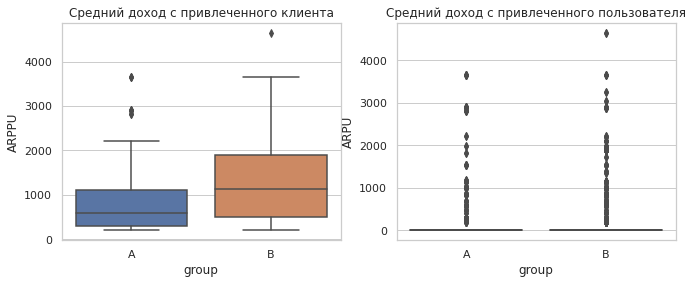

In [190]:
    visual()